**Question 01:**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
store1 = [350, 460, 20, 160, 580, 250, 210, 100, 200, 510, 290, 380]
store2 = [520, 180, 260, 380, 80, 500, 630, 420, 210, 70, 440, 140]
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Numerical Analysis

In [13]:
def analyze_store(data, name):
    print(f"{name} Analysis:")
    print(f"Mean: {np.mean(data):.2f}")
    print(f"Median: {np.median(data)}")
    print(f"Range: {np.ptp(data)}")  # (max - min)
    print(f"Variance: {np.var(data):.2f}")
    print(f"Standard Deviation: {np.std(data):.2f}")
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    print(f"IQR: {iqr}")
    # Check for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    print(f"Outliers: {outliers if outliers else 'None'}\n")

# Perform numerical analysis
analyze_store(store1, "Store 1")
analyze_store(store2, "Store 2")

Store 1 Analysis:
Mean: 292.50
Median: 270.0
Range: 560
Variance: 26252.08
Standard Deviation: 162.02
IQR: 210.0
Outliers: None

Store 2 Analysis:
Mean: 319.17
Median: 320.0
Range: 560
Variance: 32024.31
Standard Deviation: 178.95
IQR: 285.0
Outliers: None



The numerical analysis reveals that Store 2 outperforms Store 1 in average sales, with a higher mean (319.17 vs. 292.50) and median (320 vs. 270), indicating stronger overall performance. However, Store 2 exhibits greater variability in sales, as evidenced by its higher variance (32,024.31 vs. 26,252.08) and standard deviation (178.95 vs. 162.02), suggesting less consistency in monthly sales. Store 2 also has a wider interquartile range (285 vs. 210), indicating more fluctuation in sales distribution. Both stores share the same range (560), but Store 1 has a more uniform distribution, whereas Store 2 demonstrates more extreme variations, with distinct periods of higher and lower sales. Despite these fluctuations, neither store has any statistical outliers.

Graphical Analysis

 Line Chart (Monthly Trends)

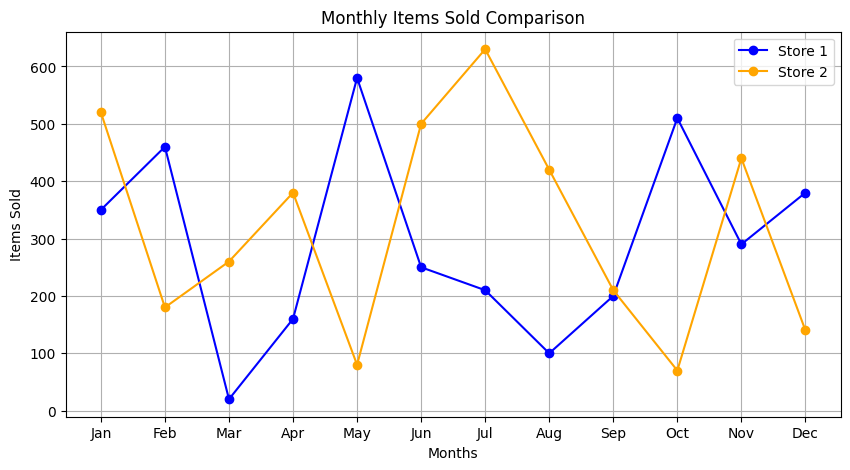

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(months, store1, marker='o', label='Store 1', linestyle='-', color='blue')
plt.plot(months, store2, marker='o', label='Store 2', linestyle='-', color='orange')
plt.xlabel("Months")
plt.ylabel("Items Sold")
plt.title("Monthly Items Sold Comparison")
plt.legend()
plt.grid(True)
plt.show()

Box Plot (Distribution Comparison)

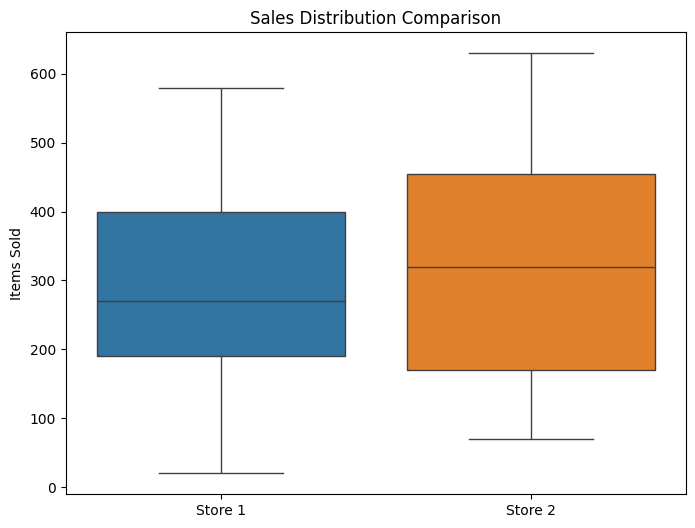

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=[store1, store2])
plt.xticks([0, 1], ['Store 1', 'Store 2'])
plt.ylabel("Items Sold")
plt.title("Sales Distribution Comparison")
plt.show()

Histograms (Frequency Distribution)

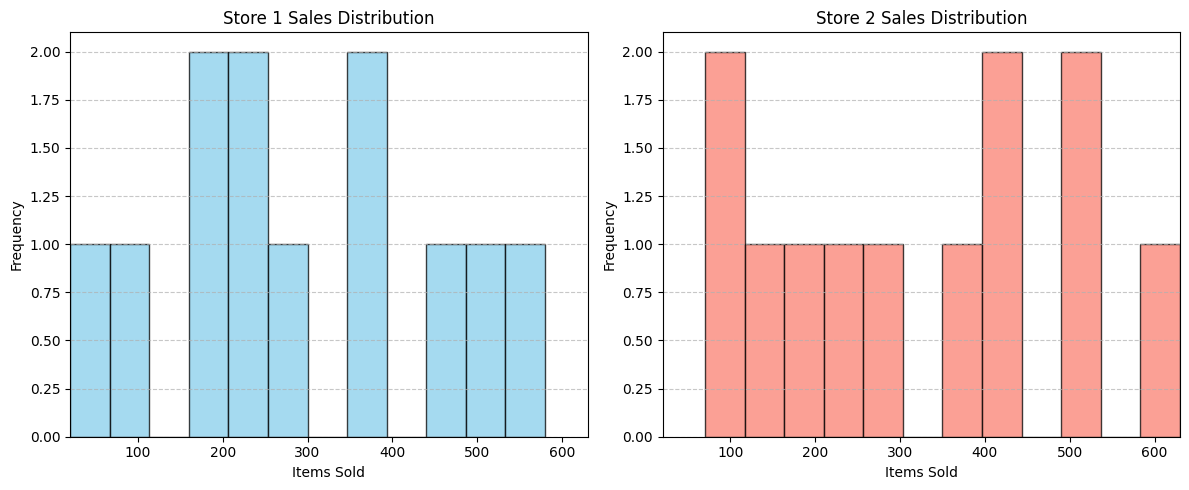

In [18]:
min_value = min(min(store1), min(store2))
max_value = max(max(store1), max(store2))

plt.figure(figsize=(12, 5))

# Store 1 Histogram
plt.subplot(1, 2, 1)
plt.hist(store1, bins=12, color='skyblue', edgecolor='black', alpha=0.75)
plt.title("Store 1 Sales Distribution")
plt.xlabel("Items Sold")
plt.ylabel("Frequency")
plt.xlim([min_value, max_value])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Store 2 Histogram
plt.subplot(1, 2, 2)
plt.hist(store2, bins=12, color='salmon', edgecolor='black', alpha=0.75)
plt.title("Store 2 Sales Distribution")
plt.xlabel("Items Sold")
plt.ylabel("Frequency")
plt.xlim([min_value, max_value])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Question 2:**

In [19]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['house_price.csv']))
df.head()

Saving house_price.csv to house_price.csv


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


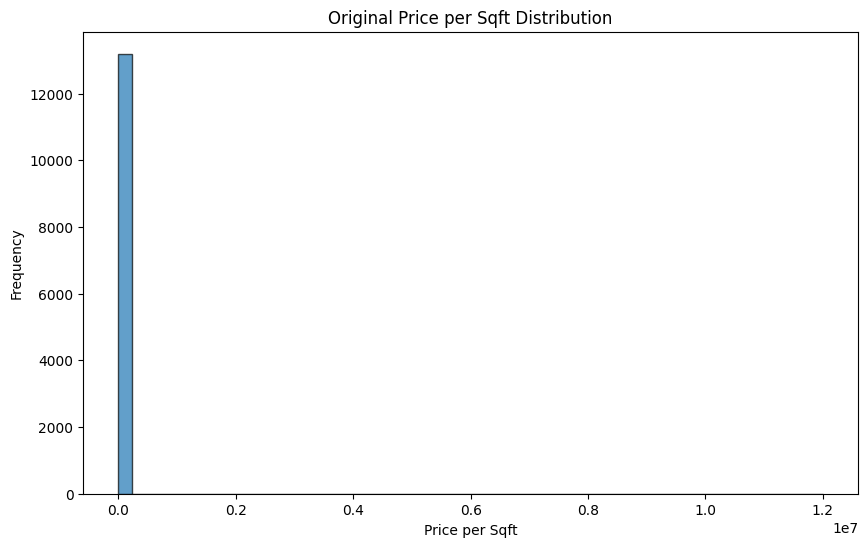

In [20]:
import matplotlib.pyplot as plt

#1. Plot histogram of price_per_sqft from the original DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df['price_per_sqft'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Original Price per Sqft Distribution')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()


In [21]:
#2.Show the range of price_per_sqft   which covers the 95% and 99.7% of the area of data points
import numpy as np

percentile_95 = np.percentile(df['price_per_sqft'], [2.5, 97.5])
percentile_997 = np.percentile(df['price_per_sqft'], [0.15, 99.85])

print(f"95% data range: {percentile_95}")
print(f"99.7% data range: {percentile_997}")

95% data range: [ 2887. 18750.]
99.7% data range: [ 1631.94   43467.4005]


In [22]:
# 3: Remove Outliers Using IQR
# Calculate Q1, Q3, and IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

lower_bound_iqr = max(lower_bound_iqr, 0)

df_iqr = df[(df['price_per_sqft'] >= lower_bound_iqr) &
            (df['price_per_sqft'] <= upper_bound_iqr)]

print("Data after IQR filtering:")
print(df_iqr.head())

Data after IQR filtering:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [23]:
#4: Size After IQR Filtering
print(f"Size after IQR filtering: {df_iqr.shape[0]} rows")

Size after IQR filtering: 11935 rows


In [24]:
# 5: Remove Outliers Using 3 Standard Deviations
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

lower_bound_3sigma = mean - 3 * std
upper_bound_3sigma = mean + 3 * std

lower_bound_3sigma = max(lower_bound_3sigma, 0)

df_3sigma = df[(df['price_per_sqft'] >= lower_bound_3sigma) &
               (df['price_per_sqft'] <= upper_bound_3sigma)]

print("Data after 3-sigma filtering:")
print(df_3sigma.head())

Data after 3-sigma filtering:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


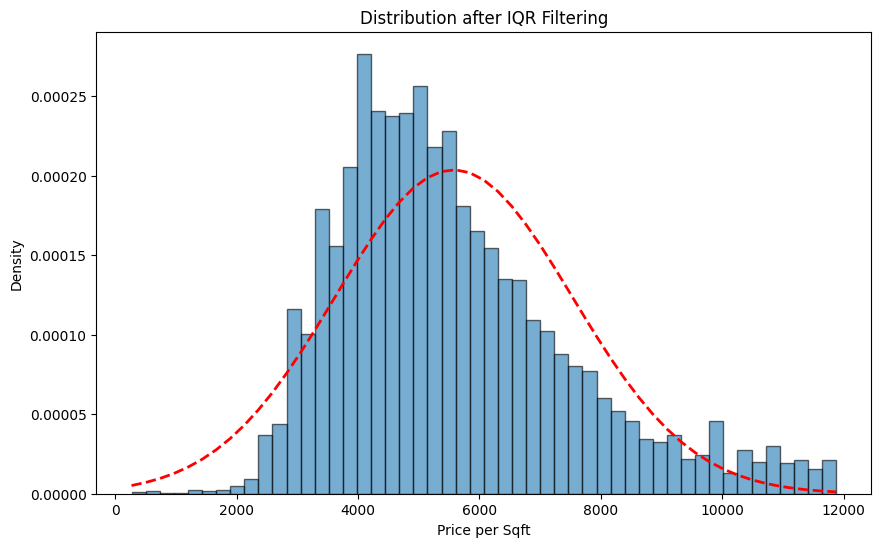

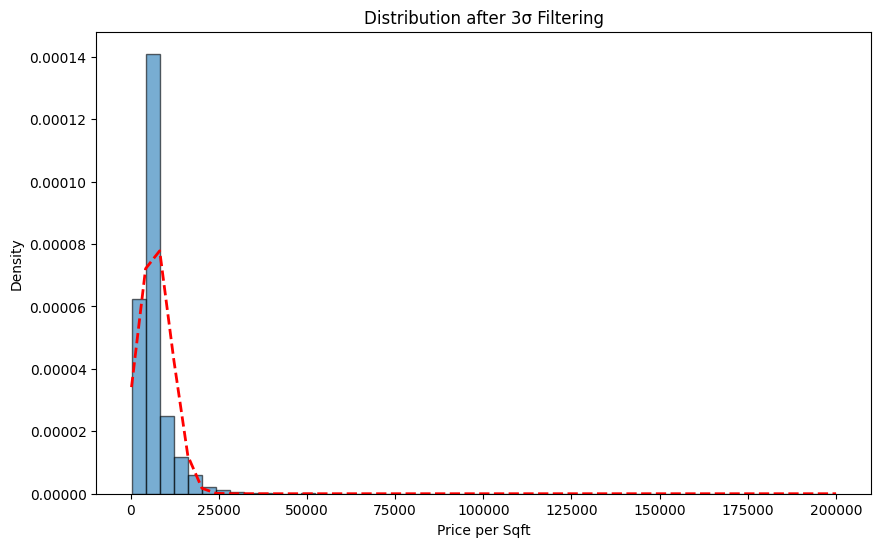

In [26]:
# 6: Plot Histograms with Bell Curves
from scipy.stats import norm

def plot_hist_with_bell(dataframe, title):
    plt.figure(figsize=(10, 6))
    mu, sigma = dataframe['price_per_sqft'].mean(), dataframe['price_per_sqft'].std()

    n, bins, patches = plt.hist(dataframe['price_per_sqft'], bins=50, density=True,
                                alpha=0.6, edgecolor='black')

    y = norm.pdf(bins, mu, sigma)
    plt.plot(bins, y, 'r--', linewidth=2)

    plt.title(title)
    plt.xlabel('Price per Sqft')
    plt.ylabel('Density')
    plt.show()
plot_hist_with_bell(df_iqr, 'Distribution after IQR Filtering')

plot_hist_with_bell(df_3sigma, 'Distribution after 3σ Filtering')

In [30]:
#8: Remove Outliers Using Z-Score
from scipy import stats
df_zscore = df[(np.abs(stats.zscore(df['price_per_sqft'])) < 3)]

print(f"Shape of original DataFrame after z-score filtering: {df_zscore.shape}")
print(f"Z-score filtering matches 3-sigma results: {df_zscore.shape == df_3sigma.shape}")

Shape of original DataFrame after z-score filtering: (13195, 7)
Z-score filtering matches 3-sigma results: True


**Question 03:**

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['winequality-red.csv']))
df.head()

Saving winequality-red.csv to winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 1. Check for Missing/Duplicate Values and Clean Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('winequality-red.csv', delimiter=',')

print("Missing values check:")
print(df.isnull().sum())

print(f"Initial shape: {df.shape}")
print(f"Duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"New shape after deduplication: {df.shape}")

Missing values check:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Initial shape: (1599, 12)
Duplicate rows: 240
New shape after deduplication: (1359, 12)


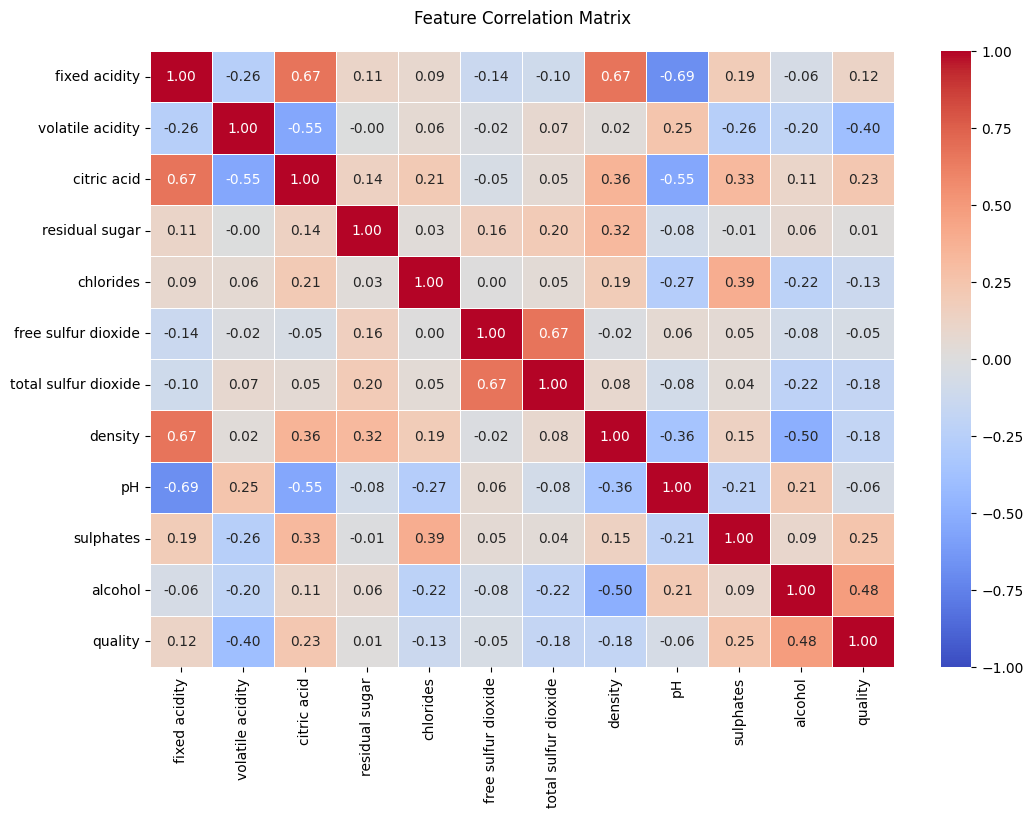

In [ ]:
#2. Correlation Heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f",
            linewidths=0.5)
plt.title('Feature Correlation Matrix', pad=20)
plt.show()

<ipython-input-16-3dd344573f88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quality_dist.index,


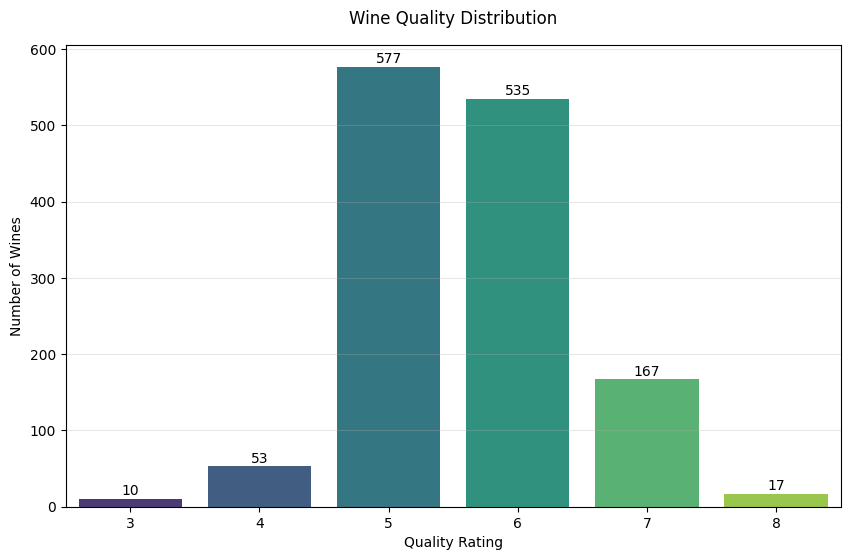

In [ ]:
#3. Quality Frequency Analysis
quality_dist = df['quality'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=quality_dist.index,
            y=quality_dist.values,
            palette='viridis')
plt.title('Wine Quality Distribution', pad=15)
plt.xlabel('Quality Rating')
plt.ylabel('Number of Wines')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

for index, value in enumerate(quality_dist.values):
    plt.text(index, value+5, str(value), ha='center')

plt.show()

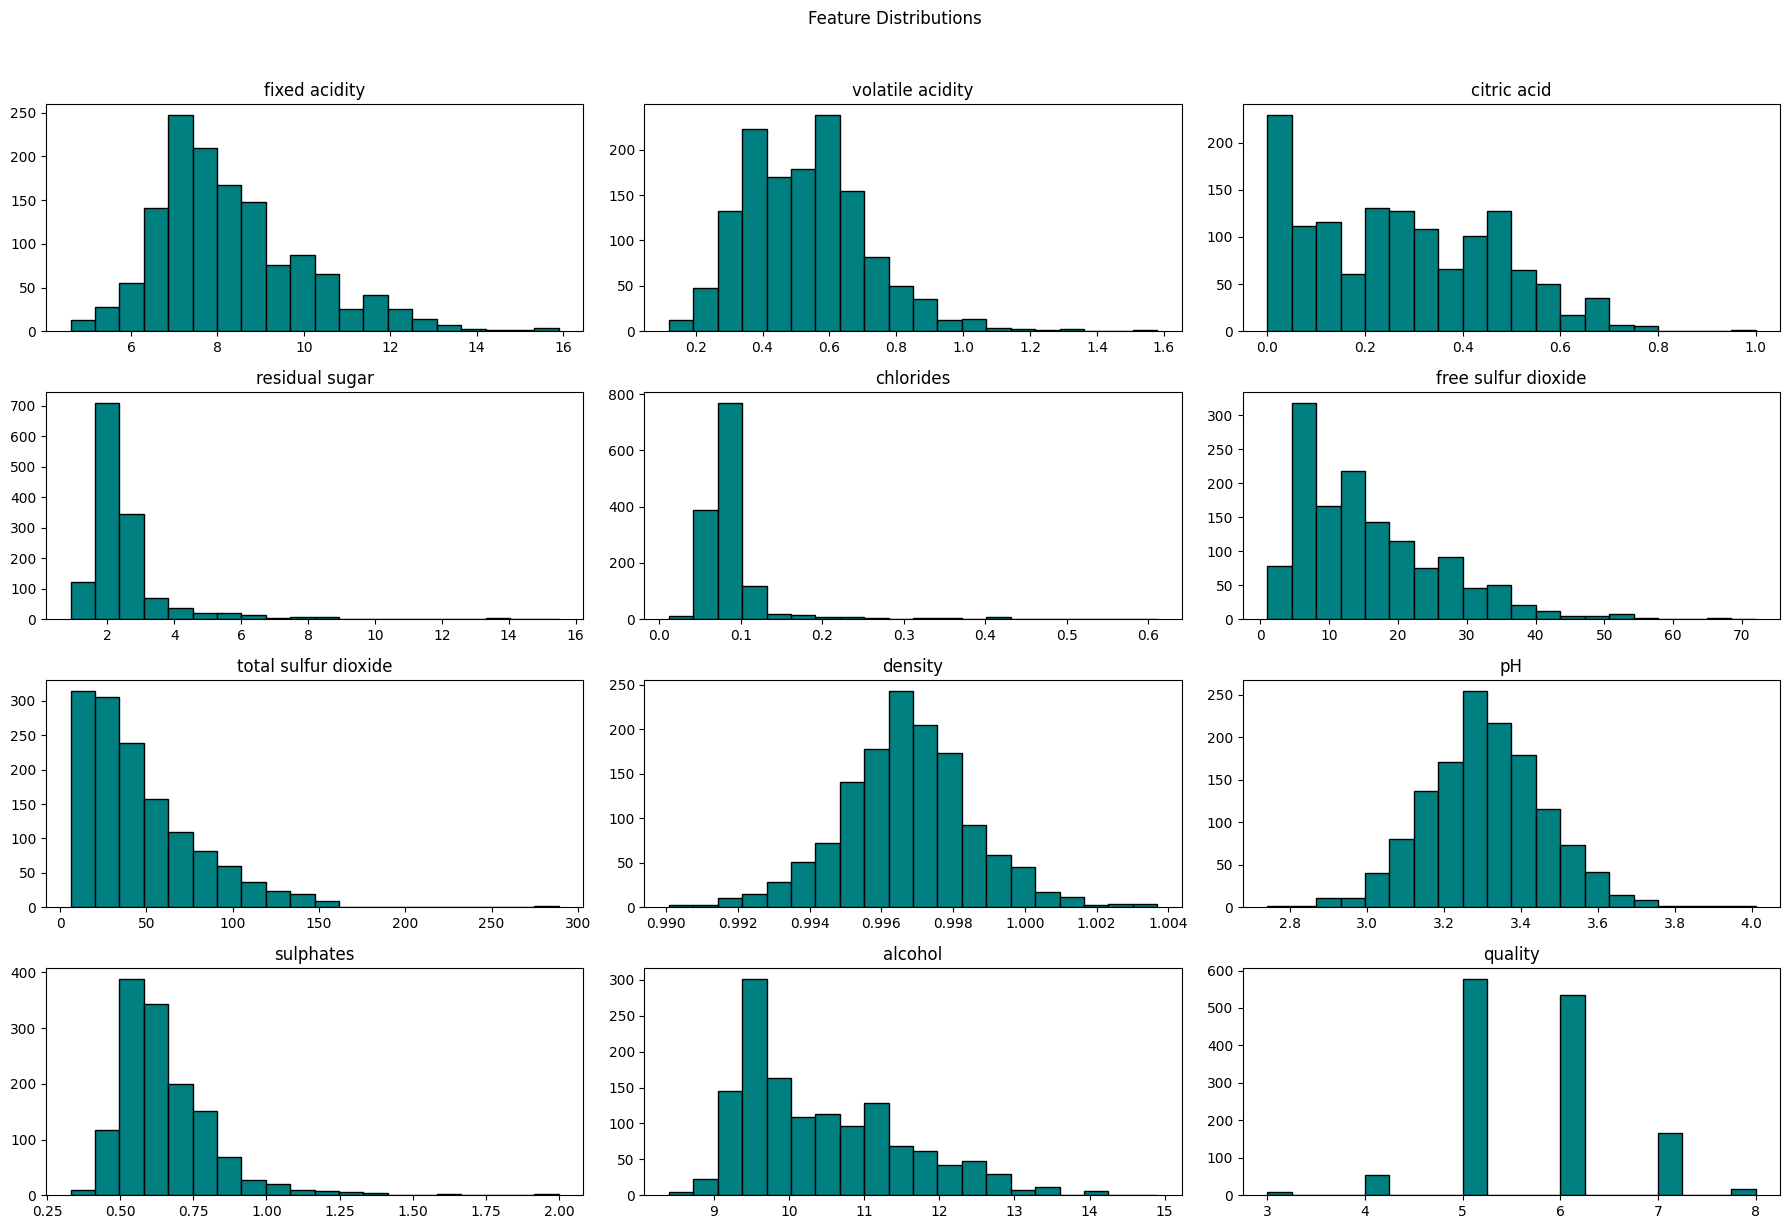

In [ ]:
#4. Histograms & Outlier Check
df.hist(figsize=(18, 12),
         bins=20,
         color='teal',
         edgecolor='black',
         xlabelsize=10,
         ylabelsize=10,
         grid=False)
plt.suptitle('Feature Distributions', y=1.02)
plt.tight_layout()
plt.show()

Outlier observations:
- Residual sugar: Right-skewed with extreme values
- Chlorides: Several high outliers
- Free sulfur dioxide: Potential right-tail outliers
- Total sulfur dioxide: Multiple extreme values

<ipython-input-18-56b22a6188f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality',


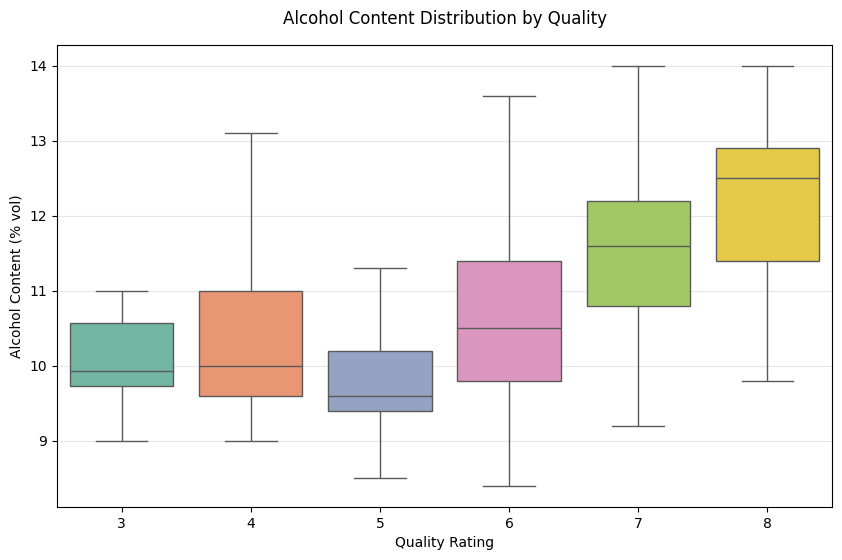

In [ ]:
#5. Alcohol vs Quality Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality',
            y='alcohol',
            data=df,
            palette='Set2',
            showfliers=False)
plt.title('Alcohol Content Distribution by Quality', pad=15)
plt.xlabel('Quality Rating')
plt.ylabel('Alcohol Content (% vol)')
plt.grid(axis='y', alpha=0.3)
plt.show()

Analysis:
- Clear positive relationship between alcohol content and quality
- Median alcohol increases from ~9.5% at Q3 to ~11.5% at Q8
- IQR ranges show significant overlap between adjacent quality grades

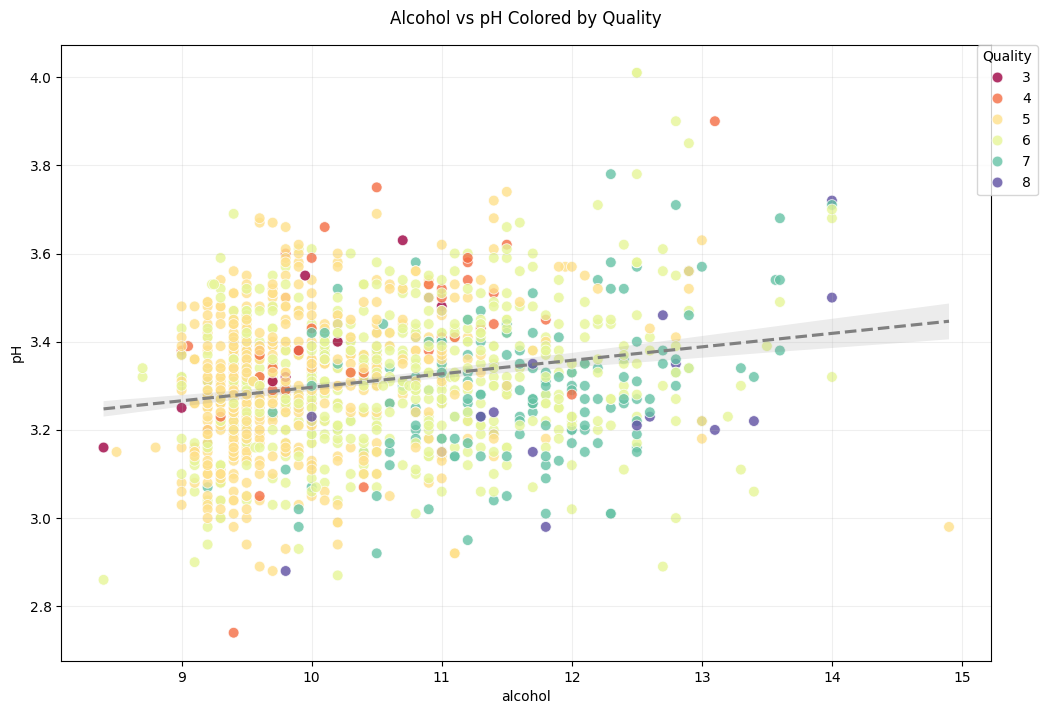

In [ ]:
#6. Alcohol-pH Scatterplot by Quality
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='alcohol',
                          y='pH',
                          hue='quality',
                          data=df,
                          palette='Spectral',
                          alpha=0.8,
                          s=60,
                          edgecolor='w')
plt.title('Alcohol vs pH Colored by Quality', pad=15)
plt.xlabel('Alcohol Content (% vol)')
plt.ylabel('pH Level')
plt.legend(title='Quality',
           bbox_to_anchor=(1.05, 1),
           borderaxespad=0)
plt.grid(alpha=0.2)

sns.regplot(x='alcohol',
            y='pH',
            data=df,
            scatter=False,
            color='grey',
            line_kws={'linestyle':'--'})

plt.show()

Insights:
- Weak negative correlation between alcohol and pH
- Higher quality wines (6-8) cluster in higher alcohol (11-13%) range
- pH range consistent across qualities (2.9-3.7)
- Quality 5 wines dominate lower alcohol range

**Question 04:**

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['iris.csv']))
df.head()

Saving iris.csv to iris.csv


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = pd.read_csv('iris.csv')

# 1. Calculate ratios and aggregate statistics

iris['sepal_ratio'] = iris['sepal_length'] / iris['sepal_width']
iris['petal_ratio'] = iris['petal_length'] / iris['petal_width']


ratio_stats = iris.groupby('species').agg({
    'sepal_ratio': ['mean', 'median', 'min', 'max', 'std'],
    'petal_ratio': ['mean', 'median', 'min', 'max', 'std']
})

print("Aggregate Statistics for Sepal and Petal Ratios:")
ratio_stats


Aggregate Statistics for Sepal and Petal Ratios:


sepal_ratio                                         petal_ratio  \
                  mean    median       min       max       std        mean   
species                                                                      
setosa        1.474578  1.467708  1.268293  1.956522  0.118693    7.078000   
versicolor    2.160402  2.161290  1.764706  2.818182  0.228658    3.242837   
virginica     2.230453  2.169540  1.823529  2.961538  0.246992    2.780662   

                                                
              median       min   max       std  
species                                         
setosa      7.000000  2.666667  15.0  3.123779  
versicolor  3.240385  2.666667   4.1  0.312456  
virginica   2.666667  2.125000   4.0  0.407367

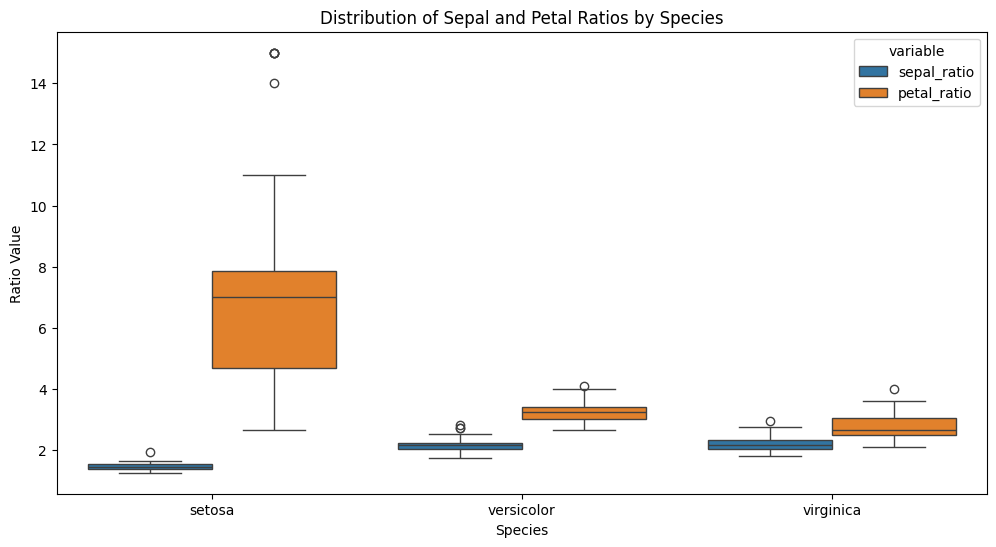

In [ ]:
# 2.Create a boxplot for sepal and petal ratios by species
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='value', hue='variable',
            data=pd.melt(iris, id_vars=['species'],
                        value_vars=['sepal_ratio', 'petal_ratio']))
plt.title('Distribution of Sepal and Petal Ratios by Species')
plt.xlabel('Species')
plt.ylabel('Ratio Value')
plt.show()

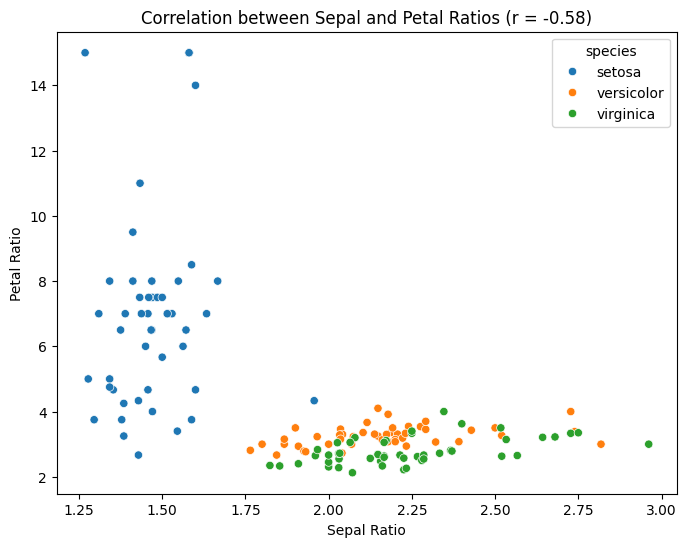

Correlation coefficient (r): -0.58
Interpretation: There is a moderate positive correlation between sepal and petal ratios.


In [ ]:
#3. Calculate correlation coefficient
corr_coef = iris[['sepal_ratio', 'petal_ratio']].corr().iloc[0,1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal_ratio', y='petal_ratio', hue='species', data=iris)
plt.title(f'Correlation between Sepal and Petal Ratios (r = {corr_coef:.2f})')
plt.xlabel('Sepal Ratio')
plt.ylabel('Petal Ratio')
plt.show()

print(f"Correlation coefficient (r): {corr_coef:.2f}")
print("Interpretation: There is a moderate positive correlation between sepal and petal ratios.")

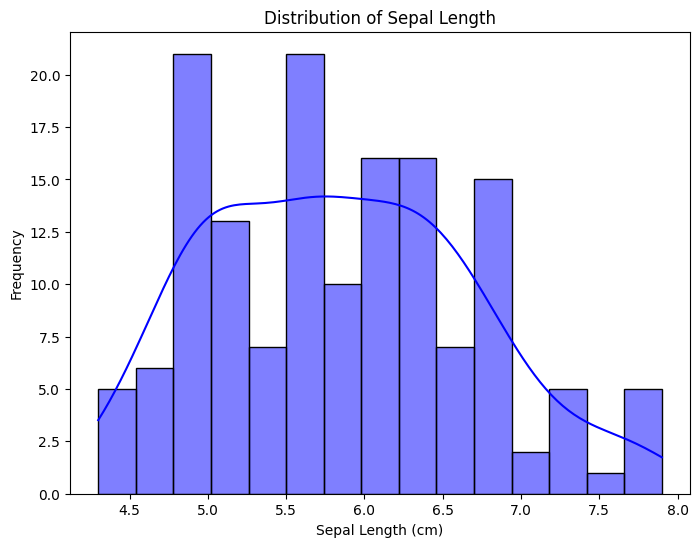

Interpretation: The histogram shows a bimodal distribution, suggesting distinct groups of sepal lengths.


In [ ]:
# 4. Create a histogram for sepal length
plt.figure(figsize=(8, 6))
sns.histplot(iris['sepal_length'], kde=True, bins=15, color='blue')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

print("Interpretation: The histogram shows a bimodal distribution, suggesting distinct groups of sepal lengths.")

In [ ]:
#5.Range of Values for 68% and 95% Coverage
# Calculate mean and standard deviation for sepal length
mean_sl = iris['sepal_length'].mean()
std_sl = iris['sepal_length'].std()

range_68 = (mean_sl - std_sl, mean_sl + std_sl)
range_95 = (mean_sl - 2*std_sl, mean_sl + 2*std_sl)

print(f"68% of data lies between: {range_68[0]:.2f} cm and {range_68[1]:.2f} cm")
print(f"95% of data lies between: {range_95[0]:.2f} cm and {range_95[1]:.2f} cm")

68% of data lies between: 5.02 cm and 6.67 cm
95% of data lies between: 4.19 cm and 7.50 cm


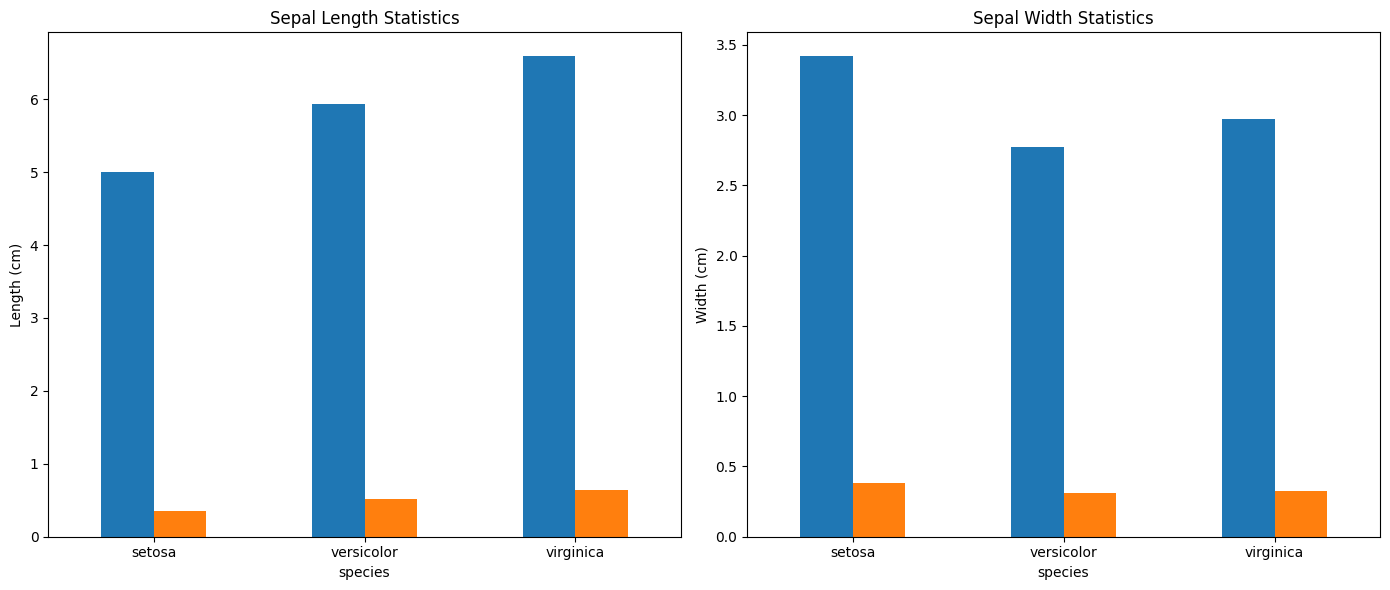

In [ ]:
#6. Bar Graphs for Sepal Length and Width
# Group by species and calculate mean and standard deviation
sepal_stats = iris.groupby('species').agg({
    'sepal_length': ['mean', 'std'],
    'sepal_width': ['mean', 'std']
})

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sepal_stats['sepal_length'].plot(kind='bar', ax=ax[0], title='Sepal Length Statistics',
                                 ylabel='Length (cm)', legend=False)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

sepal_stats['sepal_width'].plot(kind='bar', ax=ax[1], title='Sepal Width Statistics',
                                ylabel='Width (cm)', legend=False)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()